# Titanic Data Analysis 

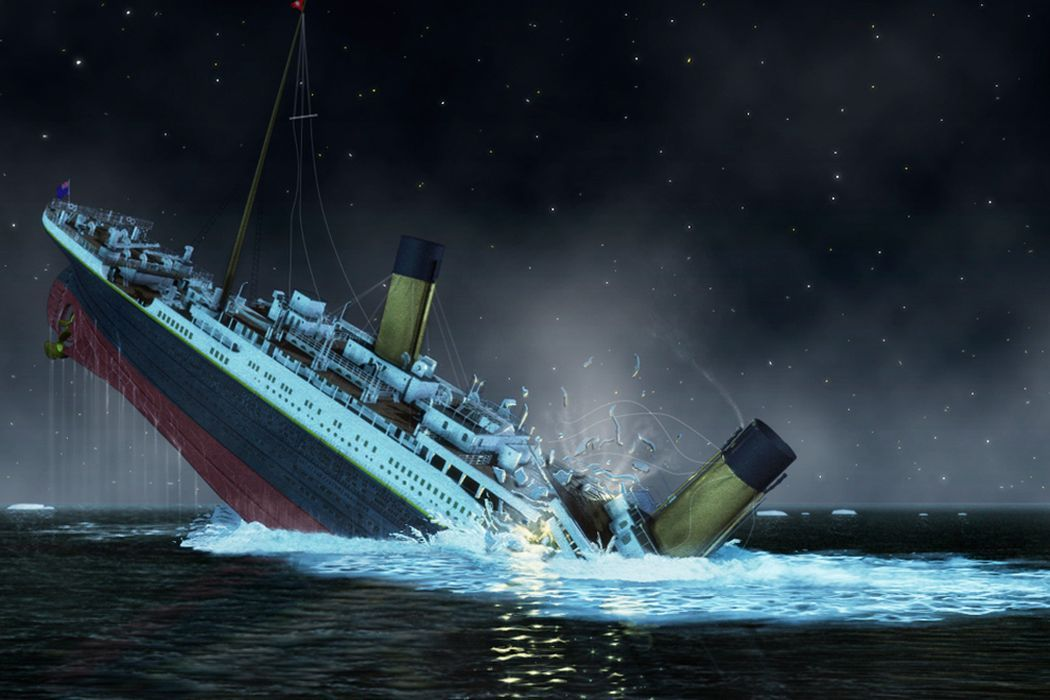

In [186]:
from IPython.display import Image 
Image("27302_c0-41-990-701_r1050x700.jpg")

<b>In this data anaylsis I analyzed what sorts of people were likely to survive the Titanic.</b> 

In [182]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data Dictionary 

* Survived: 0 = No, 1 = Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: Number of sibilings / spouses aboard the Titanic
* parch: Number of parents / children aboard the Titanic 
* ticket: Ticket Number
* cabin: Cabin Number 
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [110]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [112]:
train.shape

(891, 12)

In [113]:
test.shape

(418, 11)

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<b>There are some missing values in the age column and cabin column </b>

In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<b>There are missing values in the age, fare, and cabin column </b> 

In [116]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<b>There are 177 rows with a missing Age, 687 rows with a missing Cabin number, and 2 rows with a missing Embarked information.</b>

In [117]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<b>There are 87 rows with a missing Age, 327 rows with a missing Cabin number, and 1 row with a missing Fare value.</b>  

In [183]:
# Import python lib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [119]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

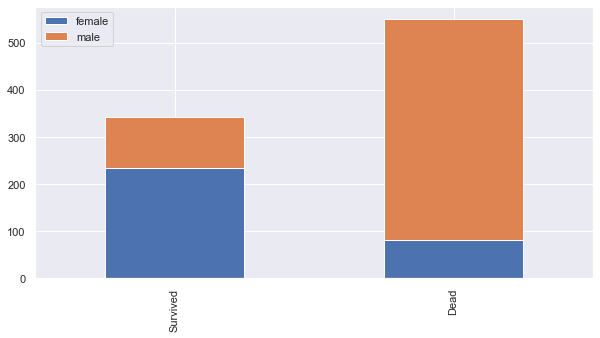

In [120]:
bar_chart('Sex')

<b>This shows that women more likely survived than men.</b>

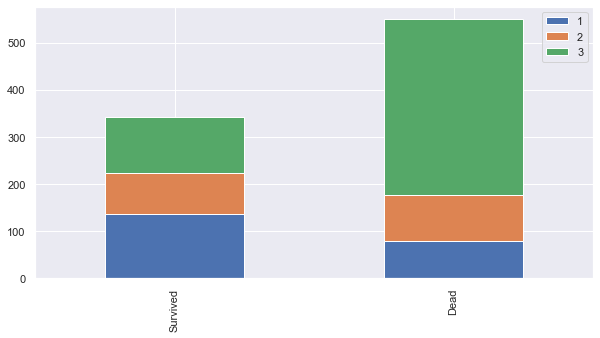

In [121]:
bar_chart('Pclass')
# 1 = 1st class
# 2 = 2nd class
# 3 = 3rd class

<b>This shows that 1st class more likely survived than the other classes. However, the 3rd class more likely died than the other classes.</b>

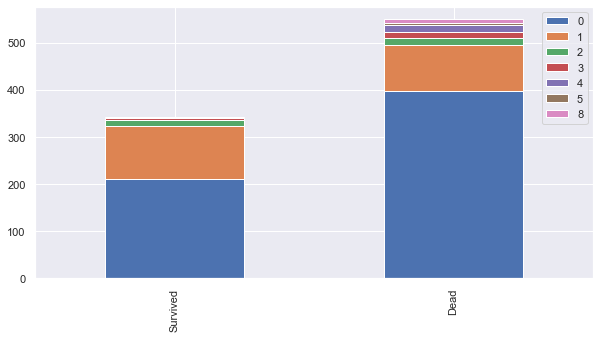

In [122]:
bar_chart('SibSp')

<b>This bar graph shows that people who boarded the ship with no sibilings or spouses were more likely to die than survive. But, people with more than 1 sibiling or spouse more likely survived</b>

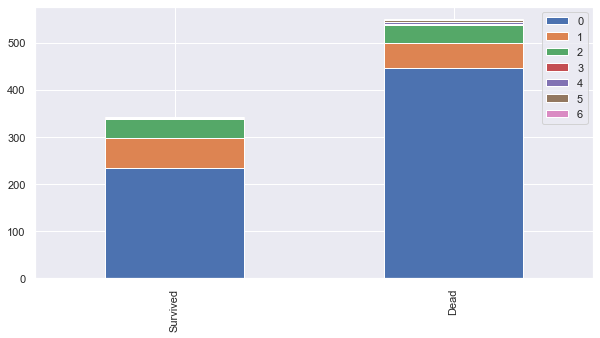

In [123]:
bar_chart('Parch')

<b>This bar graph shows that people who boarded the ship with more than 2 parents or sibilings more likely survived.</b>

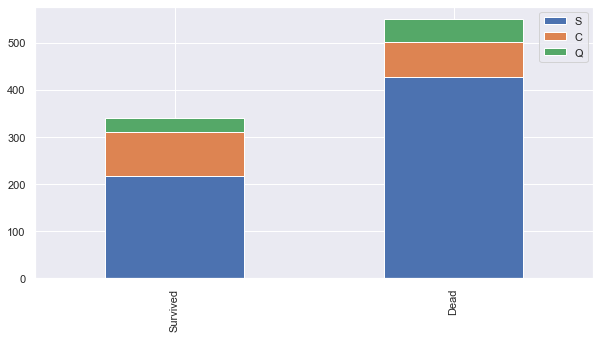

In [124]:
bar_chart('Embarked')
# C = Cherbourg
# Q = Queenstown
# S = Southampton

<b>This bar graph shows that people who boarded the ship from C (Cherbourg), slightly, had a higher chance of surviving. On the other hand, people who boarded the ship from Q (Queenstown) or S (Southampton) more likely died.</b> 

In [125]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [126]:
train_test_data = [train, test] # combines the train and test data set

for dataset in train_test_data:
    dataset ['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [127]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Sir           1
Ms            1
Lady          1
Jonkheer      1
Countess      1
Capt          1
Mme           1
Name: Title, dtype: int64

In [128]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

# Directory

- Mr: 0
- Miss: 1
- Mrs: 2
- Others: 3

In [184]:
# assign Title with integers
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona": 3, "Mme": 3, "Capt": 3, "Sir": 3}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [130]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [131]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


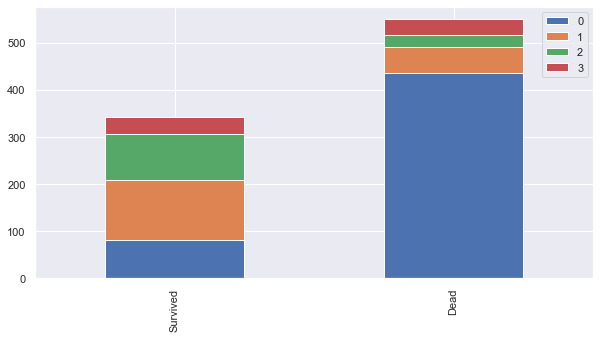

In [132]:
bar_chart('Title')

In [133]:
# get rid of unecessary features from the dataset
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [134]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [135]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


# Gender 

* Male: 0
* Female: 1

In [136]:
gender_mapping = {"male": 0, "female": 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(gender_mapping)

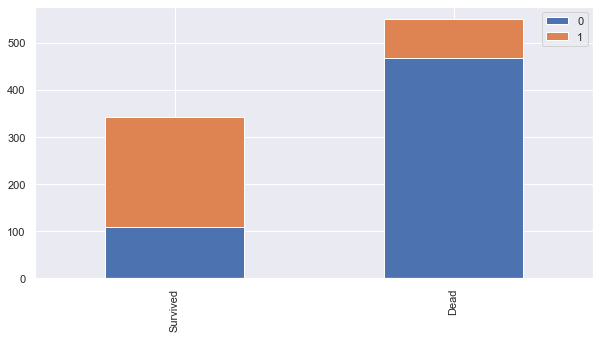

In [137]:
bar_chart('Sex')

<b>Women more likely survived than men.</b>

In [138]:
#fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace = True)
test["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace = True)

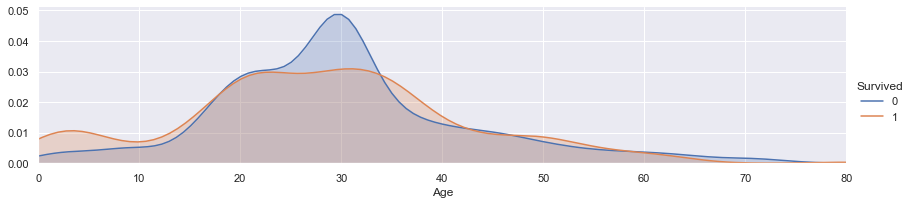

In [139]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

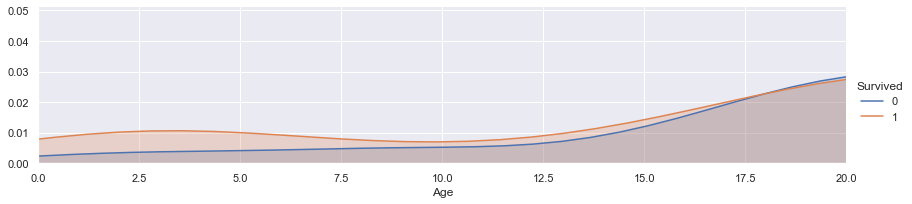

In [140]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()

plt.xlim(0, 20)

<b>People who were 0 to 20 years old had a high chance of surviving.</b>

(20.0, 30.0)

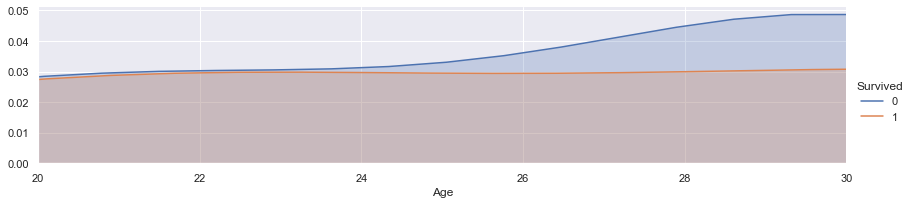

In [141]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()

plt.xlim(20, 30)

<b>People who were 20 to 24 had an equal chance of survivng or dieing. However, people over the age of 24 had higher chance of dieing.<b/>

(30.0, 40.0)

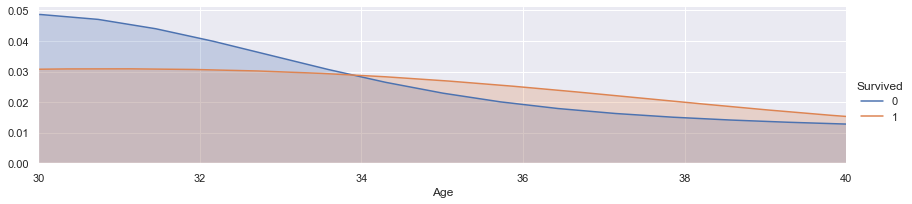

In [142]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()

plt.xlim(30, 40)

<b>People people aged from 30 to 34 had a high chance of dieing but people over the age of 34 had a high chance of surviving.</b>

(40.0, 60.0)

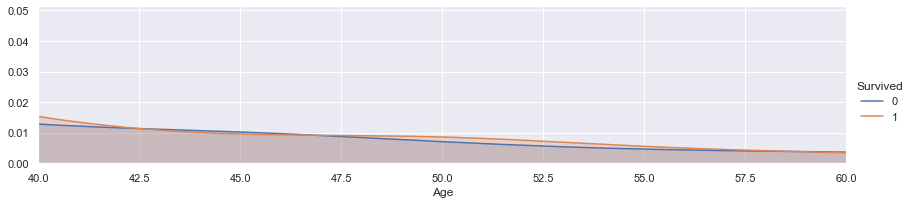

In [143]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()

plt.xlim(40, 60)

<b>People of the age group 40 to 60 almost had an equal chance of dieing and surviving.</b>

(60.0, 80.0)

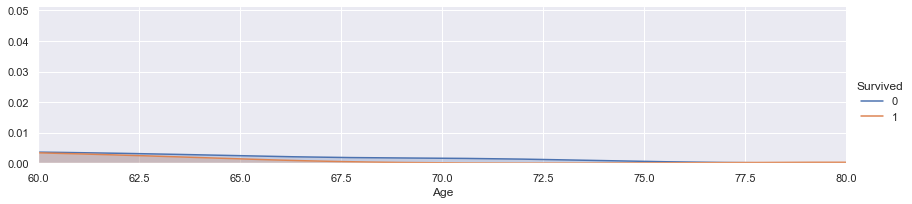

In [144]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()

plt.xlim(60, 80)

<b>People of the age group 60 to 80 almost had an equal chance of dieing and surviving.</b>

# Binning/Converting Numerical Age to Categorical Variable 

* Child: 0
* Young: 1
* Adult: 2
* Mid-Age: 3
* Senior: 4

In [145]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0, 
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1, 
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2, 
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3, 
    dataset.loc[(dataset['Age'] > 62), 'Age'] = 4

In [146]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


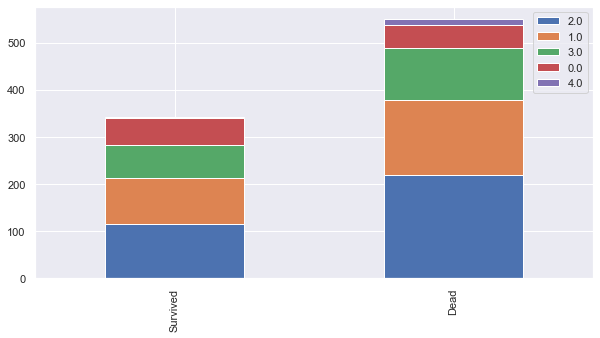

In [147]:
bar_chart('Age')
# Child (<=16): 0
# Young (>16 & <=26): 1
# Adult (>26 & <= 36): 2
# Mid-Age (>36 & <=62): 3
# Senior (>62): 4

<b>Adults had a higher chance of dieing than surviving. Young adults also had a higher hance of dieing. But children seemed to have an equal chance of survivng and dieing.</b>

# Embarked

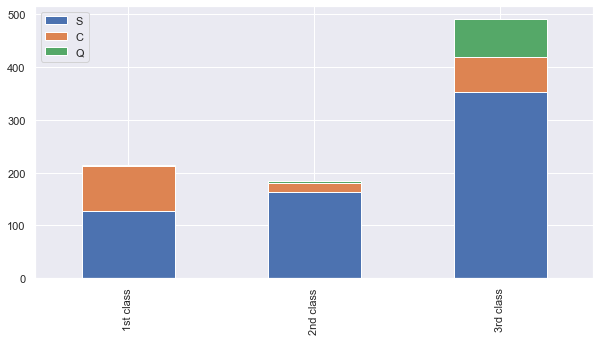

In [148]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = True, figsize = (10,5))

# C = Cherbourg
# Q = Queenstown
# S = Southampton

<b>More than 50% of the 1st class embarked from Southampton. More than 50% of the 2nd class embared from Southampton. More than 50% of the 3rd class embarked from Southampton. In conclusion, 3rd class passengers who embarked from Southampton had a higher chance of surviving amongst all the other classes.</b>

In [149]:
# fill out missing embark with S embark 
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [150]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [151]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

# Fare 

In [152]:
# fill missing Fare with median fare for each Pclass 
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
test["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)


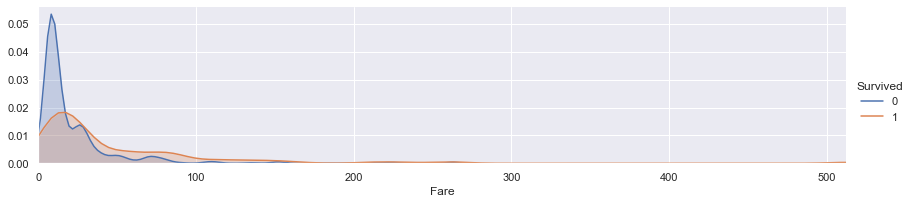

In [153]:
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot,'Fare', shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()

plt.show()
# 1 - survived 
# 0 - died 

<b>People who bought a cheaper ticket had a lower chance of surviving. While the people who bought an expensive ticket had a higher chance of surviving.</b> 

(0.0, 20.0)

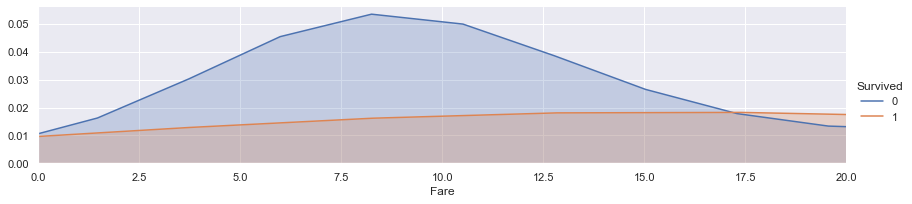

In [154]:
# lets look at the graph closely
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot,'Fare', shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

<b>People who bought a ticket in the price range of 0-20 had a lower chance of surviving.</b>

# Cabin 

In [48]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
E101           3
              ..
C30            1
A7             1
D15            1
A23            1
E46            1
Name: Cabin, Length: 147, dtype: int64

In [49]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

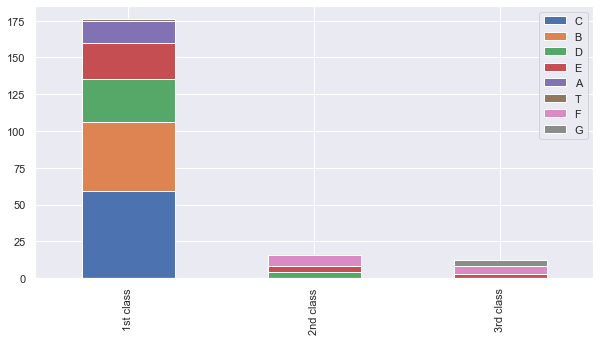

In [50]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

In [171]:
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)


In [172]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace = True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace = True)


In [173]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,7.8292,NaN,2,0,0.0
1,893,3,1,3.0,7.0000,NaN,0,2,0.4
2,894,2,0,3.0,9.6875,1.6,2,0,0.0
3,895,3,0,2.0,8.6625,NaN,0,0,0.0
4,896,3,1,1.0,12.2875,NaN,0,2,0.8


# Family Size

In [161]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1


(0.0, 11.0)

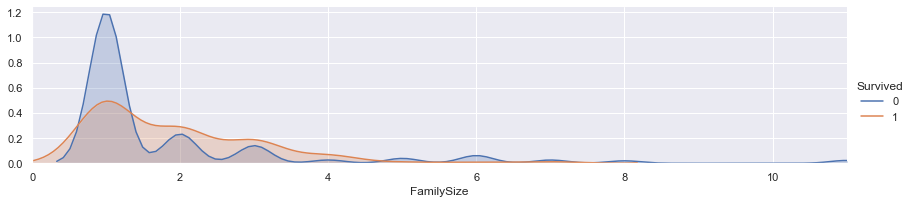

In [162]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'FamilySize', shade = True)
facet.set(xlim = (0, train['FamilySize']. max()))
facet.add_legend()
plt.xlim(0)

<b>Families who had a big family size, more likely survived. While families who had a small family size and smaller chance of surviving. </b>

In [163]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [164]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0000,NaN,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,2.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0000,NaN,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,53.1000,2.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0000,NaN,0,0,0.0


In [165]:
# Drop ticket column because it doesn't add value to the data. 
# Drop SibSp and Parch because they are already combined in the FamilySize
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)